In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline

In [146]:
df = pd.read_csv("~/Desktop/test/UCB-MFE-python-preprogram/Lectures/Lecture 3/data/hw3.csv")

In [147]:
df.set_index('ts',inplace=True)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2667 entries, 0 to 2666
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ts         2667 non-null   object 
 1   open       2667 non-null   float64
 2   high       2163 non-null   float64
 3   low        2378 non-null   float64
 4   close      2531 non-null   float64
 5   volume     2667 non-null   float64
 6   volumeUSD  0 non-null      float64
 7   token      2667 non-null   object 
 8   chain      2667 non-null   object 
dtypes: float64(6), object(3)
memory usage: 187.6+ KB


Since the volumeUSD = volume*close and there are some NA datas in the 'close' column, so we need to clean it

Check for strange data in 'token' and 'chain' columns

In [14]:
df['token'].value_counts()

BTC                                   323
COMP                                  322
CRV                                   318
SOL                                   318
USDT                                  314
UNI                                   312
AAVE                                  312
ETH                                   298
<span name="tokenName">UNI</span>      30
<span name="tokenName">ETH</span>      28
<span name="tokenName">USDT</span>     19
<span name="tokenName">CRV</span>      17
<span name="tokenName">SOL</span>      16
<span name="tokenName">AAVE</span>     16
<span name="tokenName">BTC</span>      14
<span name="tokenName">COMP</span>     10
Name: token, dtype: int64

In [15]:
df['chain'].value_counts()

ETH     1663
BTC      337
SOL      334
USDT     333
Name: chain, dtype: int64

Check dupicated data

In [17]:
df.duplicated().sum()

307

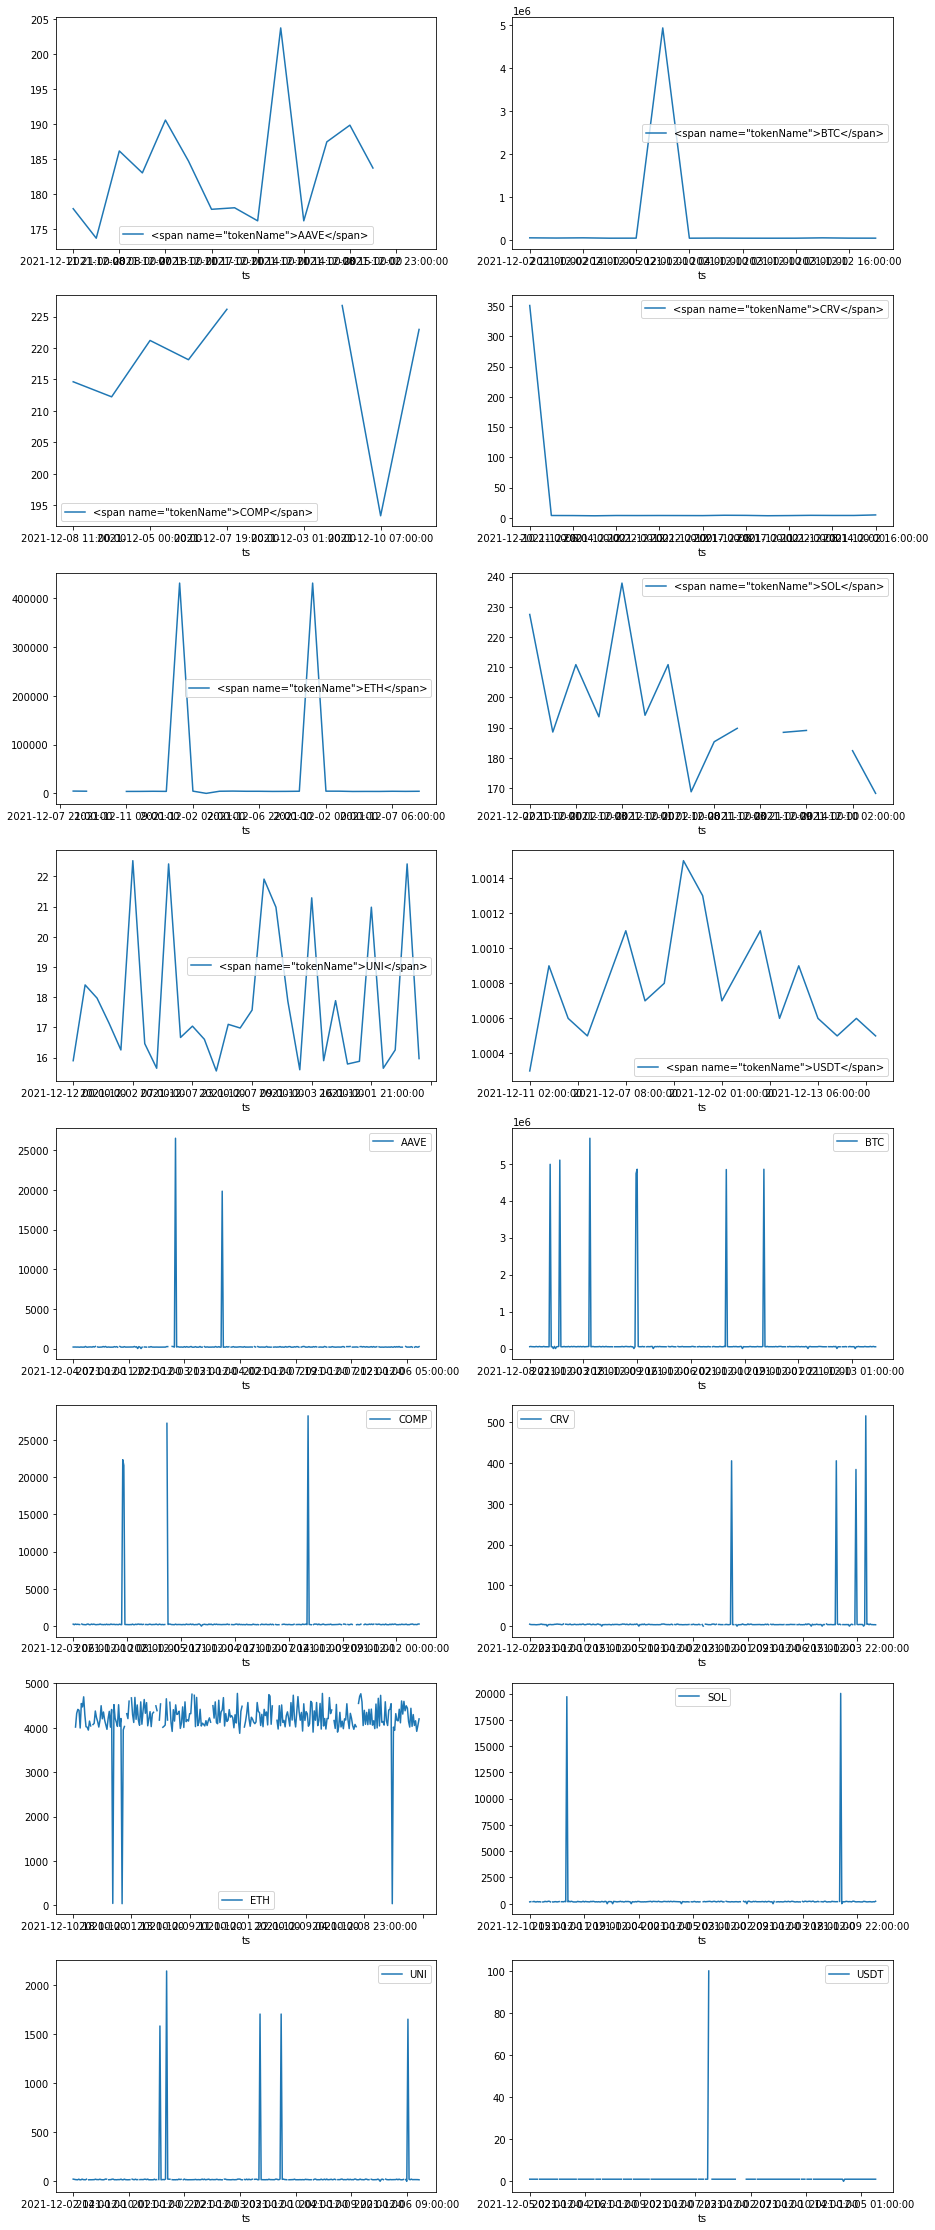

In [148]:
tokens_in_df = df.token.unique()

fig, axes = plt.subplots(nrows=math.ceil(tokens_in_df.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_df.size / 2)))

idx = 0
for label, df_token in df[['token', 'close']].groupby('token'):
    df_token['close'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1

Drop duplicated values and extract the token from blurred inputs

In [149]:
df = df.drop_duplicates()

In [150]:
temp = df.loc[df['token'].str.contains('<span'),'token'].str.extract('<span name="tokenName">(.*)<\/span>')
temp.columns = ['token']

In [151]:
df.loc[df['token'].str.contains('<span'),'token'] = temp

In [152]:
df['token'].value_counts()

UNI     295
CRV     295
SOL     295
ETH     295
AAVE    295
USDT    295
COMP    295
BTC     295
Name: token, dtype: int64

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2360 entries, 2021-12-02 14:00:00 to 2021-12-06 07:00:00
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       2360 non-null   float64
 1   high       1910 non-null   float64
 2   low        2104 non-null   float64
 3   close      2244 non-null   float64
 4   volume     2360 non-null   float64
 5   volumeUSD  0 non-null      float64
 6   token      2360 non-null   object 
 7   chain      2360 non-null   object 
dtypes: float64(6), object(2)
memory usage: 165.9+ KB


Replace the null close price with the average high-low price

If either high or low is also NA, replace the close with open price. Since all the open price is available

In [154]:
df.loc[df['close'].isnull(),'close'] = 0.5*(df.loc[df['close'].isnull(),'low']+df.loc[df['close'].isnull(),'high'])

In [155]:
df.loc[df['close'].isnull(),'close'] = df.loc[df['close'].isnull(),'open'] 

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2360 entries, 2021-12-02 14:00:00 to 2021-12-06 07:00:00
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       2360 non-null   float64
 1   high       1910 non-null   float64
 2   low        2104 non-null   float64
 3   close      2360 non-null   float64
 4   volume     2360 non-null   float64
 5   volumeUSD  0 non-null      float64
 6   token      2360 non-null   object 
 7   chain      2360 non-null   object 
dtypes: float64(6), object(2)
memory usage: 165.9+ KB


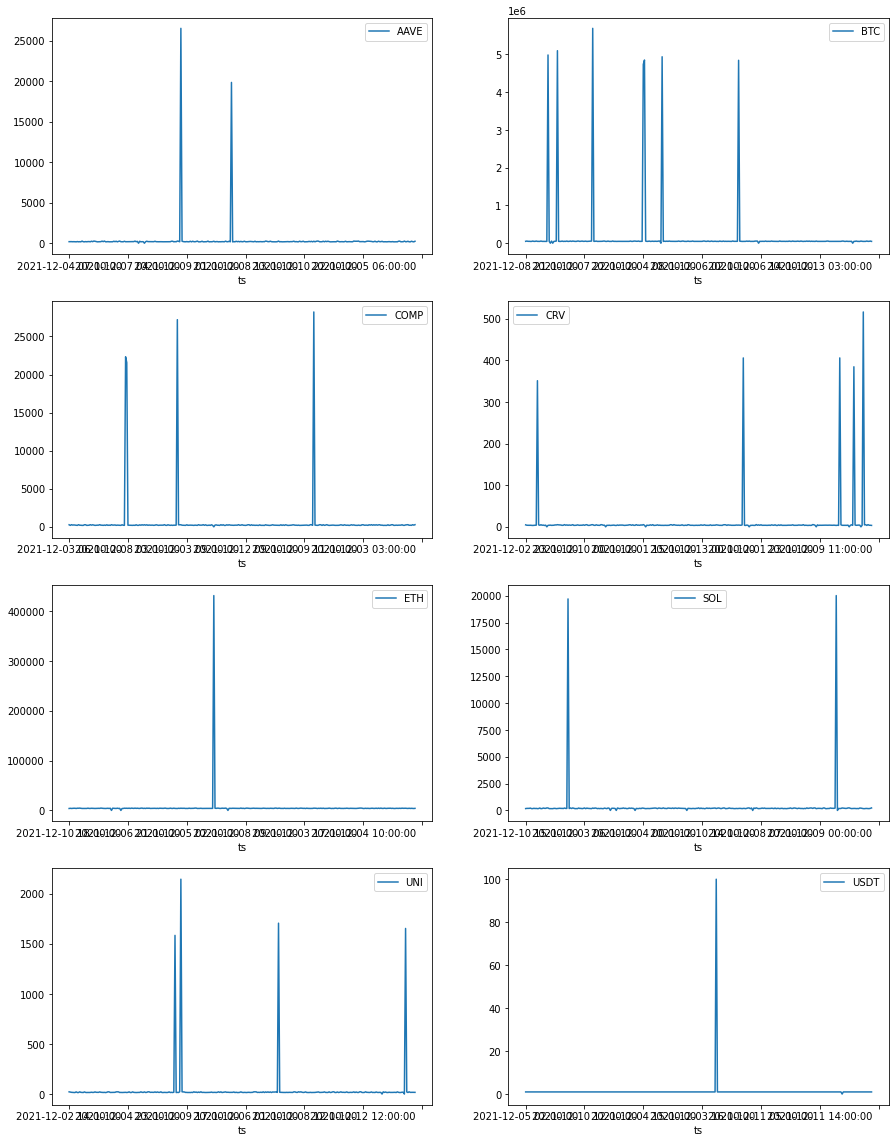

In [157]:
tokens_in_df = df.token.unique()

fig, axes = plt.subplots(nrows=math.ceil(tokens_in_df.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_df.size / 2)))

idx = 0
for label, df_token in df[['token', 'close']].groupby('token'):
    df_token['close'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1

Treat the close price extensively larger than the open price as NA. And repeat the replacement strategy again.

In [159]:
df.loc[df['close']/df['open']>2]

,open,high,low,close,volume,volumeUSD,token,chain
ts,,,,,,,,
2021-12-10 21:00:00,3.4600,3.5100,3.4600,351.00,1.080245e+05,NaN,CRV,ETH
2021-12-12 14:00:00,49542.3900,NaN,49534.7100,4983812.00,3.426704e+02,NaN,BTC,BTC
2021-12-07 08:00:00,51224.9900,51398.2600,50883.3400,5097338.00,4.433800e+02,NaN,BTC,BTC
2021-12-07 18:00:00,197.0930,197.8000,194.3450,19698.90,6.369084e+04,NaN,SOL,SOL
2021-12-08 01:00:00,223.8500,224.9800,220.3900,22333.00,1.477532e+03,NaN,COMP,ETH
2021-12-08 12:00:00,214.8900,217.1000,212.3800,21568.00,2.372441e+03,NaN,COMP,ETH
2021-12-02 23:00:00,56904.6500,56952.8100,56639.4900,5688883.00,3.821792e+02,NaN,BTC,BTC
2021-12-02 02:00:00,269.7800,272.1200,268.2900,27212.00,4.564180e+02,NaN,COMP,ETH
2021-12-06 07:00:00,16.0391,16.2298,15.8308,1584.74,7.441640e+04,NaN,UNI,ETH


In [160]:
df.loc[df['close']/df['open']>2,'close'] = 0.5*(df.loc[df['close']/df['open']>2,'high']+df.loc[df['close']/df['open']>2,'low'])
df.loc[df['close'].isnull(),'close'] = df.loc[df['close'].isnull(),'open'] 

Treat the close price extensively smaller than the open price as NA. And repeat the replacement strategy again.

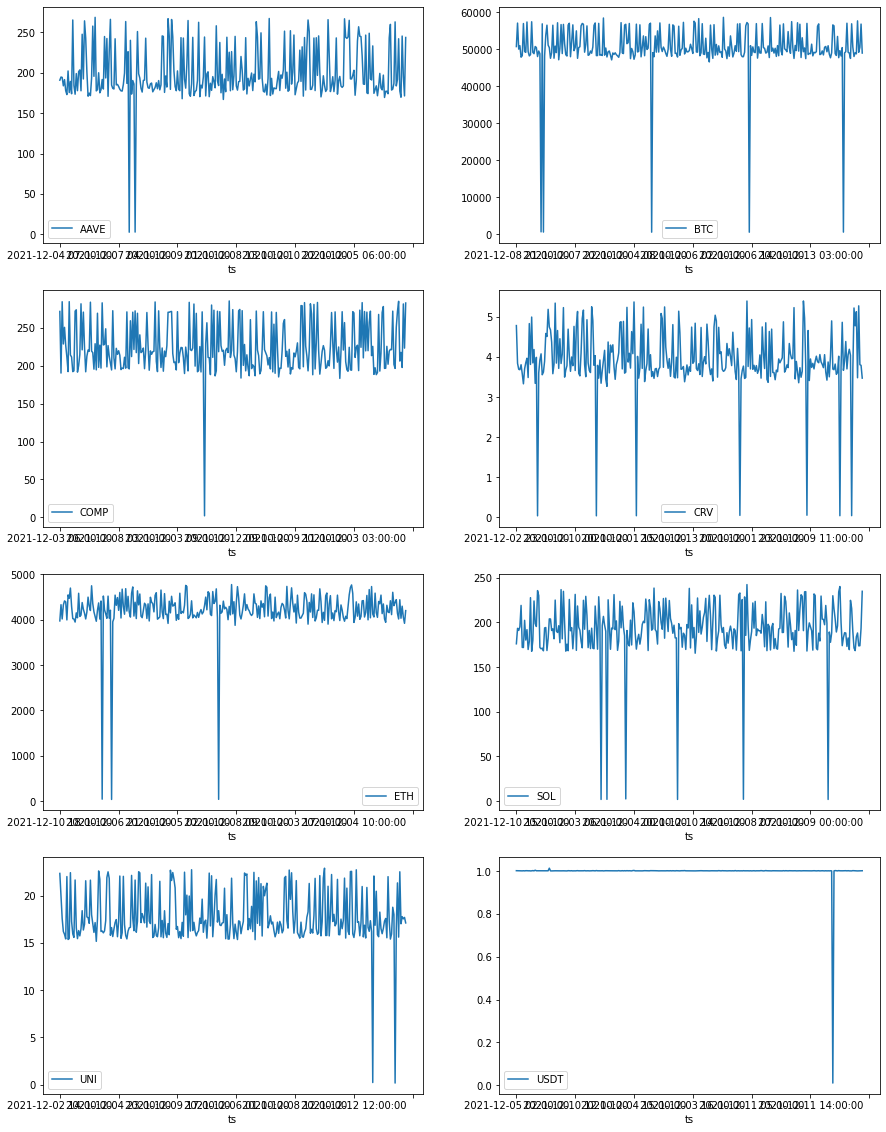

In [161]:
tokens_in_df = df.token.unique()

fig, axes = plt.subplots(nrows=math.ceil(tokens_in_df.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_df.size / 2)))

idx = 0
for label, df_token in df[['token', 'close']].groupby('token'):
    df_token['close'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1

In [163]:
df.loc[df['close']/df['open']<0.2]

,open,high,low,close,volume,volumeUSD,token,chain
ts,,,,,,,,
2021-12-03 12:00:00,56891.7000,57209.7000,56858.0200,570.337400,1.897550e+02,NaN,BTC,BTC
2021-12-07 07:00:00,50941.5000,51272.8300,50936.0500,512.250000,3.124719e+02,NaN,BTC,BTC
2021-12-06 01:00:00,3.6302,3.6365,3.4638,0.035758,4.227913e+05,NaN,CRV,ETH
2021-12-03 08:00:00,4584.3400,4588.0300,4548.0600,45.722700,2.468821e+03,NaN,ETH,ETH
2021-12-02 08:00:00,245.8090,247.5180,245.7290,2.467160,3.166740e+02,NaN,AAVE,ETH
2021-12-10 23:00:00,3996.1700,NaN,3953.7700,39.613200,8.379371e+03,NaN,ETH,ETH
2021-12-01 17:00:00,265.2620,NaN,262.9060,2.632300,9.809190e+02,NaN,AAVE,ETH
2021-12-11 12:00:00,171.8500,172.4100,169.9900,1.700800,1.572705e+04,NaN,SOL,SOL
2021-12-10 08:00:00,3.5900,3.6300,3.5400,0.035700,1.034540e+05,NaN,CRV,ETH


In [164]:
df.loc[df['close']/df['open']<0.2,'close'] = 0.5*(df.loc[df['close']/df['open']<0.2,'high']+df.loc[df['close']/df['open']<0.2,'low'])
df.loc[df['close'].isnull(),'close'] = df.loc[df['close'].isnull(),'open'] 

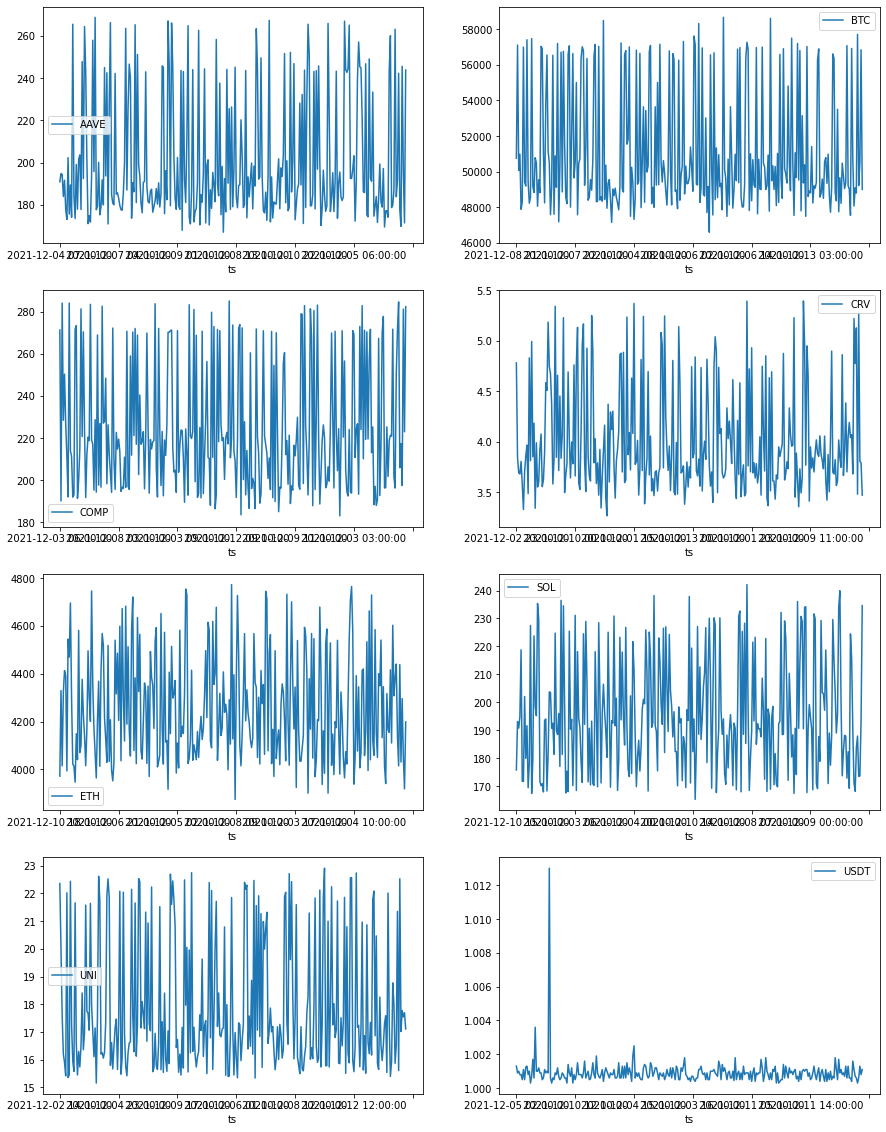

In [165]:
tokens_in_df = df.token.unique()

fig, axes = plt.subplots(nrows=math.ceil(tokens_in_df.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_df.size / 2)))

idx = 0
for label, df_token in df[['token', 'close']].groupby('token'):
    df_token['close'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1

All done I guess. Now we can retrieve the volumeUSD as volume*close

In [166]:
df['volumeUSD'] = df['volume']*df['close']

In [170]:
df.groupby(['ts','chain'])[['volumeUSD']].sum()

volumeUSD
ts                  chain              
2021-12-01 00:00:00 BTC    2.213880e+07
                    ETH    3.057435e+07
                    SOL    1.461392e+07
                    USDT   1.589673e+06
2021-12-01 01:00:00 BTC    3.455784e+07
...                                 ...
2021-12-13 05:00:00 USDT   2.180062e+06
2021-12-13 06:00:00 BTC    6.051271e+06
                    ETH    5.721253e+06
                    SOL    1.876120e+06
                    USDT   2.482253e+05

[1180 rows x 1 columns]